# Severe Weather Capstone - Pre-processing

Greg Welliver   

In [1]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.ticker as plticker
import seaborn as sns
sns.set()
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing 
import warnings
from scipy import stats
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
%matplotlib inline


import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from scipy import stats

from sklearn import linear_model, preprocessing, tree, svm, datasets, metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, auc, mean_squared_error, r2_score, f1_score, log_loss
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder as OHE
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import xgboost
from xgboost import XGBClassifier
import warnings
from subprocess import call
from IPython.display import Image
from datetime import datetime, timedelta, date
import os
import plotly.graph_objects as go
import itertools
from io import StringIO  
import pydotplus

# Seaborn settings
sns.set_context('notebook')
#sns.set_style("whitegrid")
#sns.set_style("white")
style_set = sns.set_style('whitegrid')
pd.options.display.float_format = '{:,}'.format
color_choice1 = 'plum'
color_choice2 = 'lightblue'
color_choice3 = 'lightgreen'
#ax.yaxis.set_major_formatter('{x:,.0f}')
#sns.set_context('notebook', font_scale = 4)


%matplotlib inline
import pandas as pd
#from mpl_toolkits.basemap import Basemap


import geopandas as gpd
from shapely.geometry import Point, Polygon
import contextily as ctx

from sklearn.feature_extraction.text import CountVectorizer


## Load the data



In [2]:
# load data
df = pd.read_parquet("../Data/all_storm_data11.pqt")
#df = pd.read_csv("../Data/all_storm_data4.csv")

In [3]:
df.head(40).T

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
BEGIN_YEARMONTH,202202,202202,202202,202202,202202,202202,202202,202202,202202,202202,...,202201,202208,202208,202208,202208,202208,202208,202208,202208,202208
BEGIN_TIME,2118,800,200,1609,0,500,100,100,200,400,...,1200,1811,1839,1839,1225,1220,1218,1224,1224,1230
STATE,NEVADA,NEVADA,NEVADA,ATLANTIC SOUTH,AMERICAN SAMOA,AMERICAN SAMOA,KANSAS,KANSAS,MASSACHUSETTS,MASSACHUSETTS,...,OHIO,ILLINOIS,ILLINOIS,ILLINOIS,ILLINOIS,ILLINOIS,ILLINOIS,ILLINOIS,ILLINOIS,ILLINOIS
YEAR,2022,2022,2022,2022,2022,2022,2022,2022,2022,2022,...,2022,2022,2022,2022,2022,2022,2022,2022,2022,2022
MONTH_NAME,February,February,February,February,February,February,February,February,February,February,...,January,August,August,August,August,August,August,August,August,August
EVENT_TYPE,High Wind,Heavy Snow,Heavy Snow,Waterspout,Heavy Rain,Heavy Rain,Winter Storm,Winter Storm,Heavy Snow,Heavy Snow,...,Winter Weather,Hail,Thunderstorm Wind,Thunderstorm Wind,Thunderstorm Wind,Thunderstorm Wind,Thunderstorm Wind,Thunderstorm Wind,Thunderstorm Wind,Thunderstorm Wind
BEGIN_DATE_TIME,2022-02-20 21:18:00,2022-02-21 08:00:00,2022-02-22 02:00:00,2022-02-18 16:09:00,2022-02-02 00:00:00,2022-02-12 05:00:00,2022-02-01 01:00:00,2022-02-01 01:00:00,2022-02-13 02:00:00,2022-02-13 04:00:00,...,2022-01-16 12:00:00,2022-08-29 18:11:00,2022-08-29 18:39:00,2022-08-29 18:39:00,2022-08-29 12:25:00,2022-08-29 12:20:00,2022-08-29 12:18:00,2022-08-29 12:24:00,2022-08-29 12:24:00,2022-08-29 12:30:00
INJURIES_DIRECT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
INJURIES_INDIRECT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DEATHS_DIRECT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# remove columns that won't have any predictive value
df = df.drop(['ST_CT_FIPS', 'EVENT_NARRATIVE', 'EPISODE_NARRATIVE', 'BEGIN_LON', 'BEGIN_LAT', 'BEGIN_DATE_TIME', 'MONTH_NAME', 'YEAR', 'BEGIN_YEARMONTH', 'MAGNITUDE_TYPE', 'TOR_F_SCALE'], axis=1)

In [5]:
# drop columns that have a lot of missing values
df = df.drop(['FLOOD_CAUSE', 'INJURIES_DIRECT', 'INJURIES_INDIRECT'], axis=1)

## part 2 of dropping columns

In [6]:
# started by dropping begin_time and state
#df = df.drop(['BEGIN_TIME', 'STATE'], axis=1)

# drop begin time, state, population
#df = df.drop(['BEGIN_TIME', 'STATE', 'Population'], axis=1)

# drop begin time, state, population, indirect deaths
df = df.drop(['BEGIN_TIME', 'STATE', 'Population', 'DEATHS_INDIRECT'], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1555647 entries, 0 to 1555646
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   EVENT_TYPE       1555647 non-null  object 
 1   DEATHS_DIRECT    1555647 non-null  int64  
 2   DAMAGE_PROPERTY  1555647 non-null  float64
 3   MAGNITUDE        1555647 non-null  float64
 4   TOR_LENGTH       1555647 non-null  float64
 5   TOR_WIDTH        1555647 non-null  float64
 6   DURATION         1555647 non-null  float64
 7   STORM_AREA       916584 non-null   float64
 8   PopDensity       1035753 non-null  float64
 9   HPI              1051529 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 130.6+ MB


In [8]:
df.DAMAGE_PROPERTY.value_counts()

0.0              1208379
5,000.0            44298
1,000.0            42880
10,000.0           37586
2,000.0            30523
                  ...   
124,000,000.0          1
1,710,000.0            1
3,850.0                1
81,000,000.0           1
322,200.0              1
Name: DAMAGE_PROPERTY, Length: 2060, dtype: int64

In [9]:
len(df)

1555647

In [10]:
#df = df[df['DAMAGE_PROPERTY'] > 0]

In [11]:
len(df)

347268

In [12]:
df = df.sort_values(by=['DAMAGE_PROPERTY'], ascending=False)


In [13]:
# remove outliers
df = df[513:]

In [14]:
len(df)

346755

In [15]:
df['DAMAGE_PROPERTY'].mean()

312800.4221712737

In [16]:
df['DAMAGE_PROPERTY'].median()

8000.0

In [17]:
df.head(10)

,EVENT_TYPE,DEATHS_DIRECT,DAMAGE_PROPERTY,MAGNITUDE,TOR_LENGTH,TOR_WIDTH,DURATION,STORM_AREA,PopDensity,HPI
341920,Flash Flood,0,"100,000,000.0",0.0,0.0,0.0,315.0,0.0,55.00347628,"40,173.0"
387051,Tornado,7,"100,000,000.0",0.0,6.5,400.0,10.0,0.02039999999999509,81.28457967,"26,526.0"
1338820,Flash Flood,0,"100,000,000.0",0.0,0.0,0.0,180.0,0.13149999999999906,116.2599464,"41,675.0"
1086480,Hurricane (Typhoon),0,"100,000,000.0",0.0,0.0,0.0,"1,080.0",NaN,9.458934503,"18,349.0"
1086482,Hurricane (Typhoon),0,"100,000,000.0",0.0,0.0,0.0,300.0,NaN,NaN,"19,995.0"
1491637,Storm Surge/Tide,0,"100,000,000.0",0.0,0.0,0.0,900.0,NaN,NaN,NaN
836181,Hurricane,0,"100,000,000.0",0.0,0.0,0.0,"1,800.0",NaN,NaN,"31,503.0"
148128,Tornado,1,"100,000,000.0",0.0,19.5,"4,400.0",35.0,0.183329999999998,142.9473945,"37,098.0"
1249806,Flash Flood,0,"100,000,000.0",0.0,0.0,0.0,"1,430.0",NaN,36.51369922,"22,222.0"
428855,Hail,0,"100,000,000.0",3.0,0.0,0.0,33.0,0.1893000000000029,129.959318,"43,828.0"


In [18]:
df['DAMAGE_PROPERTY'].describe()

count              346,755.0
mean      312,800.4221712737
std     3,252,968.4597323965
min                     10.0
25%                  2,000.0
50%                  8,000.0
75%                 25,000.0
max            100,000,000.0
Name: DAMAGE_PROPERTY, dtype: float64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346755 entries, 341920 to 271313
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   EVENT_TYPE       346755 non-null  object 
 1   DEATHS_DIRECT    346755 non-null  int64  
 2   DAMAGE_PROPERTY  346755 non-null  float64
 3   MAGNITUDE        346755 non-null  float64
 4   TOR_LENGTH       346755 non-null  float64
 5   TOR_WIDTH        346755 non-null  float64
 6   DURATION         346755 non-null  float64
 7   STORM_AREA       267835 non-null  float64
 8   PopDensity       284051 non-null  float64
 9   HPI              290945 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 29.1+ MB


In [20]:
# fill storm area nulls with zero
#df['STORM_AREA'] = df['STORM_AREA'].fillna(0)

In [21]:
df.head(30)

,EVENT_TYPE,DEATHS_DIRECT,DAMAGE_PROPERTY,MAGNITUDE,TOR_LENGTH,TOR_WIDTH,DURATION,STORM_AREA,PopDensity,HPI
341920,Flash Flood,0,"100,000,000.0",0.0,0.0,0.0,315.0,0.0,55.00347628,"40,173.0"
387051,Tornado,7,"100,000,000.0",0.0,6.5,400.0,10.0,0.02039999999999509,81.28457967,"26,526.0"
1338820,Flash Flood,0,"100,000,000.0",0.0,0.0,0.0,180.0,0.13149999999999906,116.2599464,"41,675.0"
1086480,Hurricane (Typhoon),0,"100,000,000.0",0.0,0.0,0.0,"1,080.0",NaN,9.458934503,"18,349.0"
1086482,Hurricane (Typhoon),0,"100,000,000.0",0.0,0.0,0.0,300.0,NaN,NaN,"19,995.0"
1491637,Storm Surge/Tide,0,"100,000,000.0",0.0,0.0,0.0,900.0,NaN,NaN,NaN
836181,Hurricane,0,"100,000,000.0",0.0,0.0,0.0,"1,800.0",NaN,NaN,"31,503.0"
148128,Tornado,1,"100,000,000.0",0.0,19.5,"4,400.0",35.0,0.183329999999998,142.9473945,"37,098.0"
1249806,Flash Flood,0,"100,000,000.0",0.0,0.0,0.0,"1,430.0",NaN,36.51369922,"22,222.0"
428855,Hail,0,"100,000,000.0",3.0,0.0,0.0,33.0,0.1893000000000029,129.959318,"43,828.0"


In [22]:
df.shape

(346755, 10)

In [23]:
df.isna().sum().sum()


197434

In [24]:
# drop rows with null values
df = df.dropna(axis=0).reset_index()
df = df.drop(['index'], axis=1)
# y_train = y_train.dropna(axis=0)
# y_test = y_test.dropna(axis=0)

In [25]:
df.shape

(239894, 10)

In [26]:
# when including storm size fill to zero
1011673

1011673

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239894 entries, 0 to 239893
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   EVENT_TYPE       239894 non-null  object 
 1   DEATHS_DIRECT    239894 non-null  int64  
 2   DAMAGE_PROPERTY  239894 non-null  float64
 3   MAGNITUDE        239894 non-null  float64
 4   TOR_LENGTH       239894 non-null  float64
 5   TOR_WIDTH        239894 non-null  float64
 6   DURATION         239894 non-null  float64
 7   STORM_AREA       239894 non-null  float64
 8   PopDensity       239894 non-null  float64
 9   HPI              239894 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 18.3+ MB


## Create dummy variables for categorical data types

In [28]:
# isolate categorical variables
categorical_features = df.select_dtypes(include=['object'])

In [29]:
df = pd.concat([df.drop(categorical_features, axis=1), pd.get_dummies(categorical_features)], axis=1)

### Split data into training and testing subsets

In [30]:
# Create the X and y matrices from the dataframe
X = df.drop(columns = ['DAMAGE_PROPERTY'])
y = df['DAMAGE_PROPERTY']

In [31]:
# from sklearn.model_selection import train_test_split; reserve 20% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=1234)

In [32]:
#X_train.isna().sum().sum()

## Scaling and Transforming Numeric Features

In [33]:
# Create subset of only the numeric columns
numeric_df = df.select_dtypes(include=['int', 'float'])
numeric_df = numeric_df.drop(columns = ['DAMAGE_PROPERTY'])

In [34]:
numeric_column_names = list(numeric_df.columns)

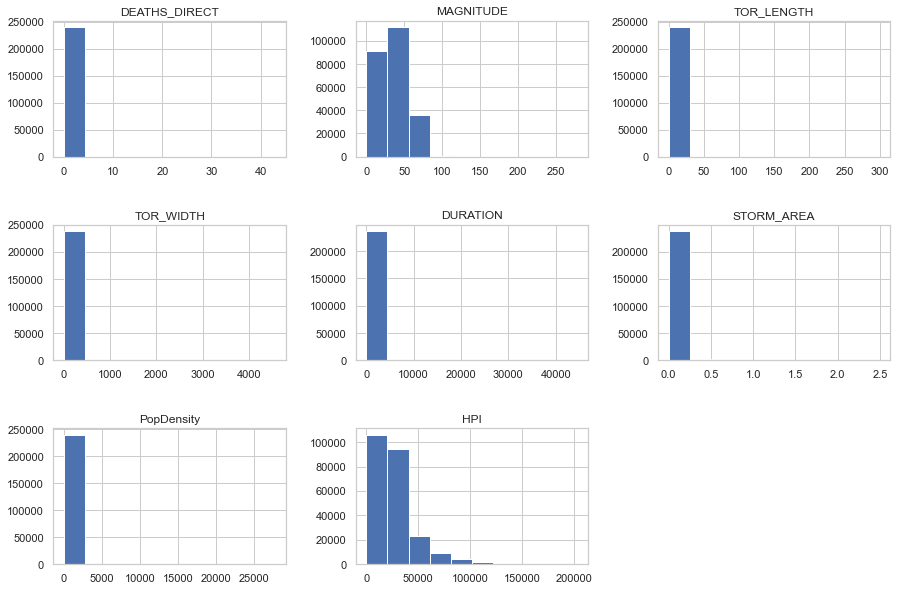

In [35]:
# let's look at the distribution of numeric variables
numeric_df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

In [36]:
# isolate numeric features of X_train and X_test
numeric_df_X_train = X_train.select_dtypes(include=['int', 'float'])
numeric_df_X_test = X_test.select_dtypes(include=['int', 'float'])

In [37]:
#numeric_df_X_test.isna().sum().sum()

### Let's try standardize features with StandardScaler
- Less sensitive to outliers (we know we have a number of significant outliers)


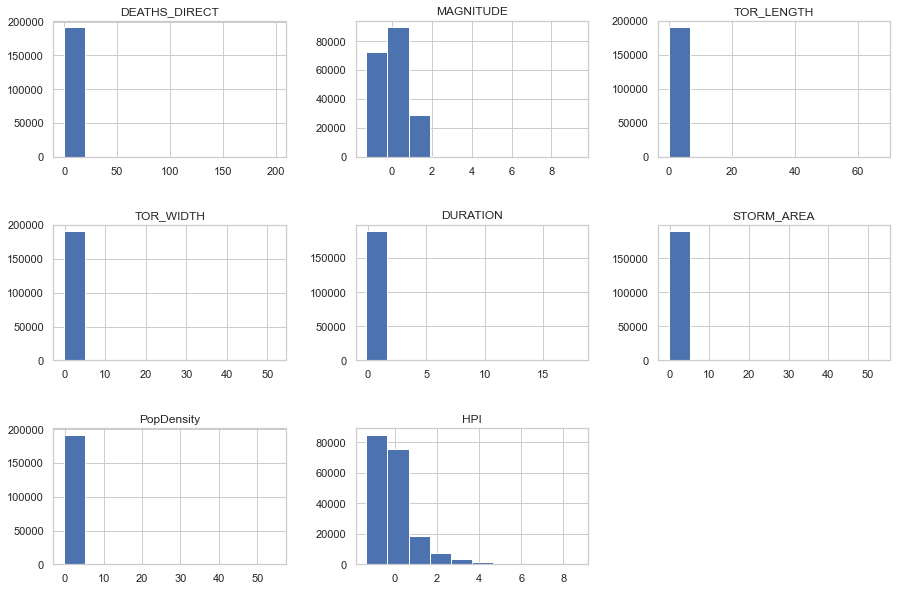

In [38]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# create model, fit, and transform
SS_scaler = StandardScaler()
numeric_df_ss_X_train = SS_scaler.fit_transform(numeric_df_X_train)
numeric_df_ss_X_test = SS_scaler.fit_transform(numeric_df_X_test)

# convert back to dataframe for plotting
numeric_df_ss_X_train = pd.DataFrame(numeric_df_ss_X_train)
numeric_df_ss_X_train.columns = numeric_column_names
numeric_df_ss_X_test = pd.DataFrame(numeric_df_ss_X_test)
numeric_df_ss_X_test.columns = numeric_column_names

numeric_df_ss_X_train.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

#### Update numeric column values with the Standardized values

In [39]:
# reset index
X_train = X_train.reset_index()
# drop extra column
X_train = X_train.drop(['index'], axis=1)

In [40]:
X_test = X_test.reset_index()
X_test = X_test.drop(['index'], axis=1)

In [41]:
for column_name in numeric_column_names:
    X_train[column_name] = numeric_df_ss_X_train[column_name]

In [42]:
for column_name in numeric_column_names:
    X_test[column_name] = numeric_df_ss_X_test[column_name]

In [43]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

### Look at correlation matrix to see if relationships are still preserved after transformations

In [44]:
df2 = X

In [45]:
df2.head()

,DEATHS_DIRECT,MAGNITUDE,TOR_LENGTH,TOR_WIDTH,DURATION,STORM_AREA,PopDensity,HPI,EVENT_TYPE_Debris Flow,EVENT_TYPE_Dust Devil,EVENT_TYPE_Flash Flood,EVENT_TYPE_Flood,EVENT_TYPE_Funnel Cloud,EVENT_TYPE_Hail,EVENT_TYPE_Heavy Rain,EVENT_TYPE_High Wind,EVENT_TYPE_Lightning,EVENT_TYPE_Thunderstorm Wind,EVENT_TYPE_Tornado
0,-0.041888316205157504,0.6351158758065769,-0.15850301628143004,-0.1465483687546355,-0.1157120708045282,-0.27530670577458166,-0.24221967159456076,-0.4022614919527665,0,0,0,0,0,0,0,0,0,1,0
1,-0.041888316205157504,-1.2668621974867313,-0.15850301628143004,-0.1465483687546355,-0.11652141680391066,-0.27530670577458166,-0.19219010748923593,-0.4513344870589856,0,0,0,0,0,0,0,0,1,0,0
2,-0.041888316205157504,1.2057092977945694,-0.15850301628143004,-0.1465483687546355,-0.11045132180854217,-0.27530670577458166,0.09821992489169953,0.5070901475531493,0,0,0,0,0,0,0,0,0,1,0
3,-0.041888316205157504,0.4449180684772461,-0.15850301628143004,-0.1465483687546355,-0.11652141680391066,-0.27530670577458166,-0.24098207643269856,-0.8442137718512032,0,0,0,0,0,0,0,0,0,1,0
4,-0.041888316205157504,0.6351158758065769,-0.15850301628143004,-0.1465483687546355,-0.11652141680391066,-0.27530670577458166,-0.0633494471024798,0.38300487106089415,0,0,0,0,0,0,0,0,0,1,0


In [46]:
df2['DAMAGE_PROPERTY'] = y

In [47]:
df2.head()

,DEATHS_DIRECT,MAGNITUDE,TOR_LENGTH,TOR_WIDTH,DURATION,STORM_AREA,PopDensity,HPI,EVENT_TYPE_Debris Flow,EVENT_TYPE_Dust Devil,EVENT_TYPE_Flash Flood,EVENT_TYPE_Flood,EVENT_TYPE_Funnel Cloud,EVENT_TYPE_Hail,EVENT_TYPE_Heavy Rain,EVENT_TYPE_High Wind,EVENT_TYPE_Lightning,EVENT_TYPE_Thunderstorm Wind,EVENT_TYPE_Tornado,DAMAGE_PROPERTY
0,-0.041888316205157504,0.6351158758065769,-0.15850301628143004,-0.1465483687546355,-0.1157120708045282,-0.27530670577458166,-0.24221967159456076,-0.4022614919527665,0,0,0,0,0,0,0,0,0,1,0,"100,000,000.0"
1,-0.041888316205157504,-1.2668621974867313,-0.15850301628143004,-0.1465483687546355,-0.11652141680391066,-0.27530670577458166,-0.19219010748923593,-0.4513344870589856,0,0,0,0,0,0,0,0,1,0,0,"100,000,000.0"
2,-0.041888316205157504,1.2057092977945694,-0.15850301628143004,-0.1465483687546355,-0.11045132180854217,-0.27530670577458166,0.09821992489169953,0.5070901475531493,0,0,0,0,0,0,0,0,0,1,0,"100,000,000.0"
3,-0.041888316205157504,0.4449180684772461,-0.15850301628143004,-0.1465483687546355,-0.11652141680391066,-0.27530670577458166,-0.24098207643269856,-0.8442137718512032,0,0,0,0,0,0,0,0,0,1,0,"100,000,000.0"
4,-0.041888316205157504,0.6351158758065769,-0.15850301628143004,-0.1465483687546355,-0.11652141680391066,-0.27530670577458166,-0.0633494471024798,0.38300487106089415,0,0,0,0,0,0,0,0,0,1,0,"100,000,000.0"


In [48]:
# before dropping columns # df2_corr = df2[['BEGIN_TIME','DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'MAGNITUDE', 'TOR_LENGTH', 'TOR_WIDTH', 'DURATION', 'STORM_AREA', 'PopDensity', 'Population', 'HPI']]
df2_corr = df2[['DEATHS_DIRECT', 'DAMAGE_PROPERTY', 'MAGNITUDE', 'TOR_LENGTH', 'TOR_WIDTH', 'DURATION', 'STORM_AREA', 'PopDensity', 'HPI']]

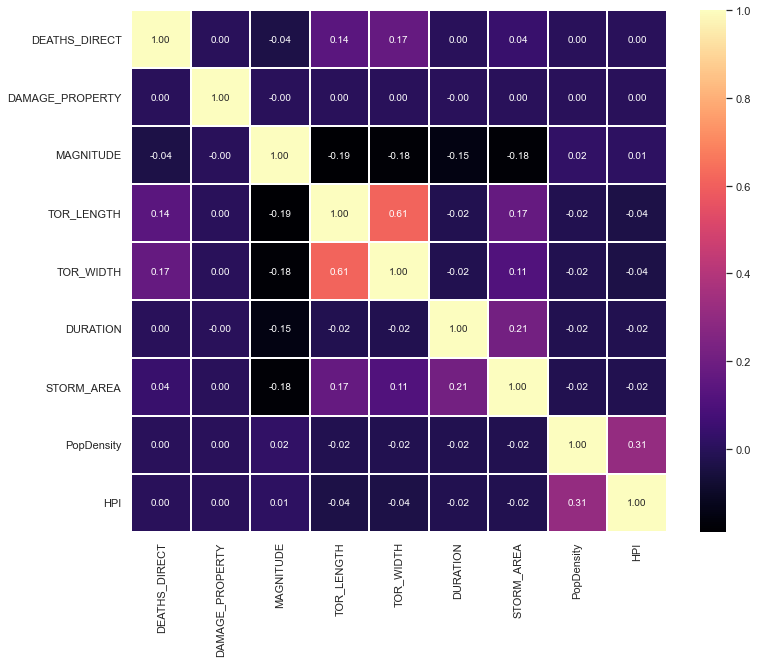

In [49]:
corrmat = df2_corr.corr()
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap='magma',fmt='.2f',
                 linewidths=.05)
#hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
#                 linewidths=.05)

f.subplots_adjust(top=0.93)
#t= f.suptitle('Match Data Feature Correlation for all USA matches', fontsize=14)

Looks like the relationships are largely in tact

In [50]:
# convert y_test and y_train to dataframes so they can be written to file
y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)

#### write to parquest - 4 files

In [51]:
from pathlib import Path  
filepath = Path('/Users/gregwelliver/Desktop/springboard_files/Severe-Weather-Repo/Data/X_train.pqt')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
X_train.to_parquet(filepath)

In [52]:
from pathlib import Path  
filepath = Path('/Users/gregwelliver/Desktop/springboard_files/Severe-Weather-Repo/Data/X_test.pqt')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
X_test.to_parquet(filepath)

In [53]:
from pathlib import Path  
filepath = Path('/Users/gregwelliver/Desktop/springboard_files/Severe-Weather-Repo/Data/y_train.pqt')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
y_train.to_parquet(filepath)

In [54]:
from pathlib import Path  
filepath = Path('/Users/gregwelliver/Desktop/springboard_files/Severe-Weather-Repo/Data/y_test.pqt')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
y_test.to_parquet(filepath)